In [4]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from I3Tray import *
from icecube.dataclasses import ModuleKey
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi
import scipy.constants as spc
import SelectingDoublePeakDOM
import random, re, os
from optparse import OptionParser
from os.path import expandvars

In [2]:
'''

Loading the geometry

'''

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

loaded geometry


In [3]:
infile = '/data/p-one/akatil/step_4_medium_water/step_4_506_medium_water_custom_mDOM_noise.i3.gz'
outfile = '/data/p-one/akatil/test/step_4_506_medium_water_doublePeak.i3.gz'

tray = I3Tray()

tray.AddModule('I3Reader', 'reader',
            FilenameList = [gcd_file, infile]
            )

tray.AddModule(SelectingDoublePeakDOM.definingDOMs, "Double Peak Selector",
               omgeo = omgeo,
               InputMCPETree = "MCPESeriesMap",
               NoiseMCPETree = "NoiseSeriesMap",
               OutputMCPETree = "DoublePeakMap")

tray.AddModule("I3Writer","writer",
               #SkipKeys=SkipKeys,
               Filename = outfile,
               Streams = [icetray.I3Frame.DAQ, icetray.I3Frame.Physics],
              )

tray.AddModule("TrashCan","adios")
tray.Execute()
tray.Finish()


TypeError: No registered converter was able to produce a C++ rvalue of type std::string from this Python object of type list

In [ ]:
/data/p-one/akatil/step_4_medium_water/step_4_506_medium_water_custom_mDOM_noise.i3.gz

In [3]:
directory = '/data/p-one/akatil/step_4_medium_water/'
start = 410
end = 413

In [3]:
class definingDOMs(icetray.I3ConditionalModule):
    """
    Finding DOMs that show clear double peak structures.
    """
    
    def __init__(self, context):
        icetray.I3ConditionalModule.__init__(self, context)
        self.AddParameter("omgeo",
                        "geometry map given for the analysis",
                        "omgeo")
        
        self.AddParameter("InputMCPETree",
                         "Input MCPETree name for analysis",
                         "MCPESeriesMap")
        
        self.AddParameter("NoiseMCPETree",
                         "Noise MCPETree name for analysis",
                         "NoiseSeriesMap")
        
        self.AddParameter("OutputMCPETree",
                         "Output MCPETree name",
                         "DoublePeakMap")
        self.AddOutBox("OutBox")
    
    def Configure(self):
        
        self.omgeo = self.GetParameter("omgeo")
        self.mcpeSeries = self.GetParameter("InputMCPETree")
        self.noiseSeries = self.GetParameter("NoiseMCPETree")
        self.output = self.GetParameter("OutputMCPETree")
        
    def DAQ(self, frame):
        
        mctree = frame["I3MCTree"]
        doublePeakMap = simclasses.I3MCPESeriesMap()
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        
        if lepton.type == 15 or lepton.type == -15:
            
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z
            
            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z
                    
            mcpeMap = frame[self.mcpeSeries]
            noiseMap = frame[self.noiseSeries]
            
            for omkey in noiseMap.keys():
                oKey = omgeo.get(omkey)
                
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z
                
                noise_mcpeList = noiseMap[omkey]
                noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
                
                if omkey in mcpeMap.keys():
                    mcpeList = mcpeMap[omkey]
                    timeList = np.array([mcpe.time for mcpe in mcpeList])
                    tot_timeList = np.append(timeList, noise_timeList)
                else:
                    tot_timeList = noise_timeList
                
                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                refractiveIndex = 1.333
                speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                speed_of_light_ns = speed_of_light_water
                
                tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]
                
                
                doublePeakList = simclasses.I3MCPESeries()
                
                if abs(tDiff_ns) > 20 and abs(tDiff_ns) < 400 and firstVertex < 250 and secondVertex < 250 and len(tot_timeList) > 200:
                        
                    for time in totTimeList:
                        mcpe_new = simclasses.I3MCPE()
                        mcpe_new.npe = 1
                        mcpe_new.time = time
                        doublePeakList.append(mcpe_new)
                        
                    
                    doublePeakMap[omkey] = doublePeakList
                    
                    frame[self.output] = doublePeakMap
                    
                    self.PushFrame(frame)
                

In [12]:
x_double_peak, y_double_peak, z_double_peak = ([]), ([]), ([])
        
        x_center, y_center, z_center = ([]), ([]), ([])
        
        x_fv, y_fv, z_fv = ([]), ([]), ([])
        
        x_mid, y_mid, z_mid = ([]), ([]), ([])
        
        charge = ([])

charge = np.append(charge, len(tot_timeList))
x_center = np.append(x_center, x_dom)
                y_center = np.append(y_center, y_dom)
                z_center = np.append(z_center, z_dom)
                
                x_fv = np.append(x_fv, x_dom-x_tau_pos)
                y_fv = np.append(y_fv, y_dom-y_tau_pos)
                z_fv = np.append(z_fv, z_dom-z_tau_pos)
                
                x_mid = np.append(x_mid, x_dom-(x_tau_pos - x_td_pos)/2)
                y_mid = np.append(y_mid, y_dom-(y_tau_pos - y_td_pos)/2)
                z_mid = np.append(z_mid, z_dom-(z_tau_pos - z_td_pos)/2)
                
x_double_peak = np.append(x_double_peak, x_dom)
                    y_double_peak = np.append(y_double_peak, y_dom)
                    z_double_peak = np.append(z_double_peak, z_dom)

mctree = frame["I3MCTree"]
primary = mctree.primaries
lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        
if lepton.type != 15 or lepton.type != -15:
    
    
        

NuTauBar


In [4]:
xCoG = ([])
yCoG = ([])
zCoG = ([])

xCoG_fv, yCoG_fv, zCoG_fv = ([]), ([]), ([])

xCoG_sv, yCoG_sv, zCoG_sv = ([]), ([]), ([])



for file_num in range(start,end):
    print(file_num)
    file = dataio.I3File(directory + 'step_4_'+str(file_num)+'_medium_water_custom_mDOM_noise.i3.gz')
    
    x, y, z = ([]), ([]), ([])
    xfv, yfv, zfv = ([]), ([]), ([])
    xsv, ysv, zsv = ([]), ([]), ([])
    charge = ([])
    
    maxHits = 0
    timestamps = 0
    
    for frame in file:
        #print(frame.keys())
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z

            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    #print(tau_daughters[td])
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z
                    
            mcpeMap = frame['MCPESeriesMap']
            noiseMap = frame['NoiseSeriesMap']
            
            for omkey in noiseMap.keys():
                oKey = omgeo.get(omkey)
                
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z
        
                #noise_mcpeList = noiseMap[omkey]
                #noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
                #mcpeList = mcpeMap[omkey]
                #timeList = np.array([mcpe.time for mcpe in mcpeList])
                #tot_timeList = np.append(timeList, noise_timeList)
                
                noise_mcpeList = noiseMap[omkey]
                noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            
                if omkey in mcpeMap.keys():
                    mcpeList = mcpeMap[omkey]
                    timeList = np.array([mcpe.time for mcpe in mcpeList])
                    tot_timeList = np.append(timeList, noise_timeList)
                else:
                    tot_timeList = noise_timeList
                    
                charge = np.append(charge, len(tot_timeList))
                
                if len(tot_timeList) > maxHits:
                    maxHits = len(tot_timeList)
                    timestamps = tot_timeList
                    max_x_dom = x_dom
                    max_y_dom = y_dom
                    max_z_dom = z_dom
                
                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                refractiveIndex = 1.333
                speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                speed_of_light_ns = speed_of_light_water
                
                x = np.append(x, x_dom)
                y = np.append(y, y_dom)
                z = np.append(z, z_dom)
                
                xfv = np.append(xfv, x_dom-x_tau_pos)
                yfv = np.append(yfv, y_dom-y_tau_pos)
                zfv = np.append(zfv, z_dom-z_tau_pos)
                
                xsv = np.append(xsv, x_dom-(x_tau_pos - x_td_pos)/2)
                ysv = np.append(ysv, y_dom-(y_tau_pos - y_td_pos)/2)
                zsv = np.append(zsv, z_dom-(z_tau_pos - z_td_pos)/2)
                
                tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]
                #timeDiff = np.append(timeDiff, tDiff_ns)
            
            xCoG = np.append(xCoG,sum(x*charge)/sum(charge))
            yCoG = np.append(yCoG,sum(y*charge)/sum(charge))
            zCoG = np.append(zCoG,sum(z*charge)/sum(charge))
            
            xCoG_fv = np.append(xCoG_fv,sum(xfv*charge)/sum(charge))
            yCoG_fv = np.append(yCoG_fv,sum(yfv*charge)/sum(charge))
            zCoG_fv = np.append(zCoG_fv,sum(zfv*charge)/sum(charge))
            
            xCoG_sv = np.append(xCoG_sv,sum(xsv*charge)/sum(charge))
            yCoG_sv = np.append(yCoG_sv,sum(ysv*charge)/sum(charge))
            zCoG_sv = np.append(zCoG_sv,sum(zsv*charge)/sum(charge))
                #print('Time Difference: ', tDiff_ns)
                
               
                          
            
                        
            
        

410
411
412


In [5]:
arr = np.empty((0,3), int)
doms_CoG = []
doms_CoG_fv = []
doms_CoG_mid = []
oKeys_inFrame = []
#dist_vert = np.vstack(dist_vert)

f = 0
for file_num in range(start,end):
    print(file_num)
    file = dataio.I3File(directory + 'step_4_'+str(file_num)+'_medium_water_custom_mDOM_noise.i3.gz')
    
    for frame in file:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        dist, dist_fv, dist_mid = [], [], []
        oKeys = []
        
        if lepton.type == 15 or lepton.type == -15:
            noiseMap = frame['NoiseSeriesMap']
            
            domNum = 0
            for omkey in noiseMap.keys():
                oKey = omgeo.get(omkey)
            
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z
            
                distCoG = np.sqrt((x_dom - xCoG[f])**2 + (y_dom - yCoG[f])**2 + (z_dom - zCoG[f])**2)
                distCoG_fv = np.sqrt((x_dom - xCoG_fv[f])**2 + (y_dom - yCoG_fv[f])**2 + (z_dom - zCoG_fv[f])**2)
                distCoG_mid = np.sqrt((x_dom - xCoG_sv[f])**2 + (y_dom - yCoG_sv[f])**2 + (z_dom - zCoG_sv[f])**2)
            
                dist.append(distCoG)
                dist_fv.append(distCoG_fv)
                dist_mid.append(distCoG_mid)
                oKeys.append(domNum)
                
                domNum+=1
        
            #newDist = np.vstack(Distance)
            #print('after vstack', newDist.shape)
            #print('didstance_vert', dist_vert.shape)
            #print('here')
            doms_CoG.append(dist)
            doms_CoG_fv.append(dist_fv)
            doms_CoG_mid.append(dist_mid)
            oKeys_inFrame.append(oKeys)
            #print('new dist_vert', dist_vert.shape)
            #print(f)
        
            f = f+1

doms_CoG = np.asarray(doms_CoG)
doms_CoG_fv = np.asarray(doms_CoG_fv)
doms_CoG_mid = np.asarray(doms_CoG_mid)
oKeys_inFrame = np.asarray(oKeys_inFrame)

410
411
412


In [6]:
smallestD = min(doms_CoG[1, :])
a = int(oKeys_inFrame[1, :][doms_CoG[1, :] == smallestD])
print(noiseMap.keys()[a])

OMKey(8,10,0)


410
411
412


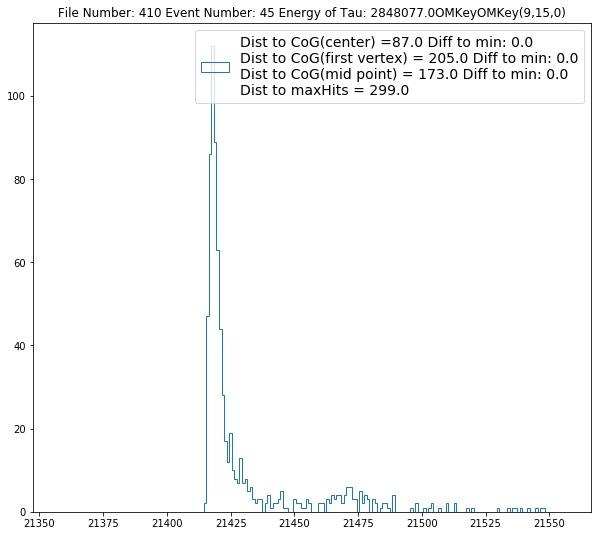

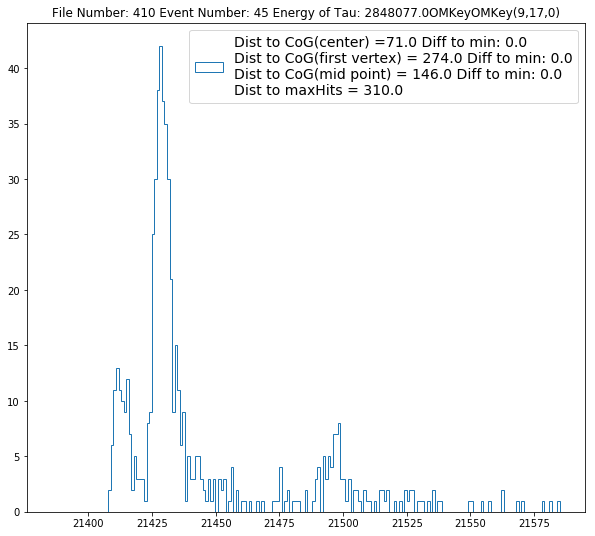

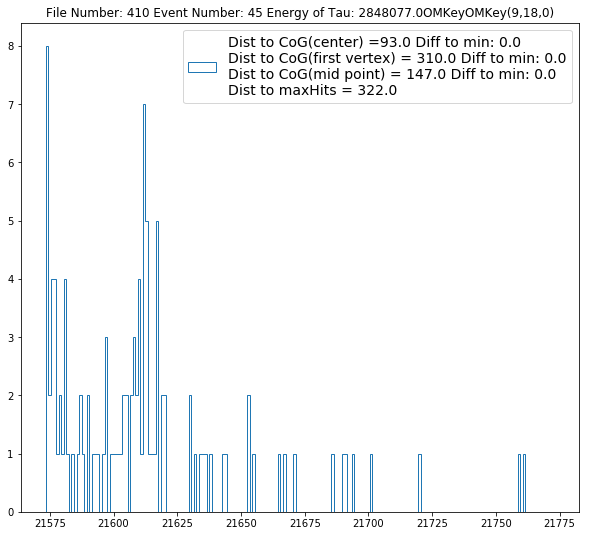

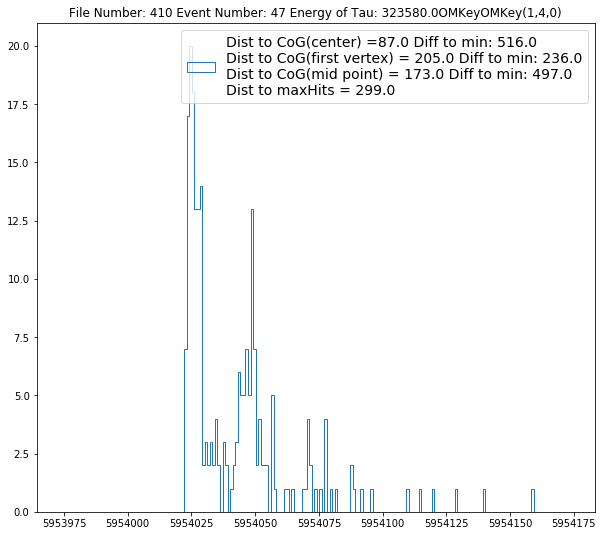

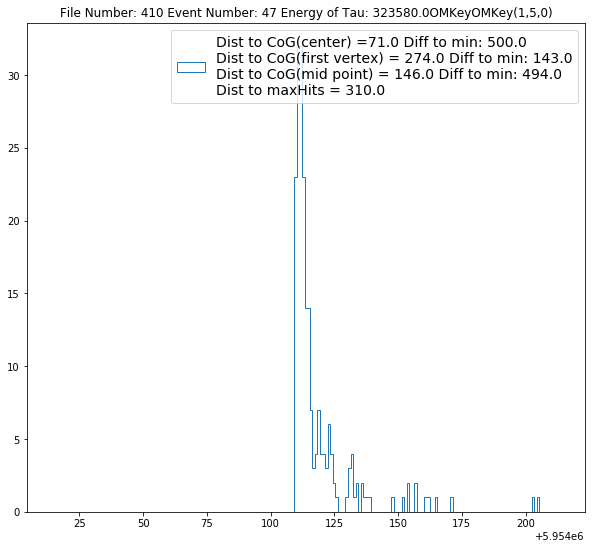

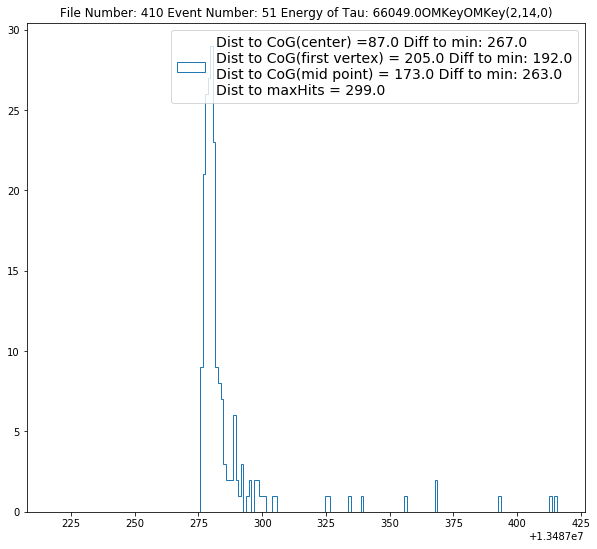

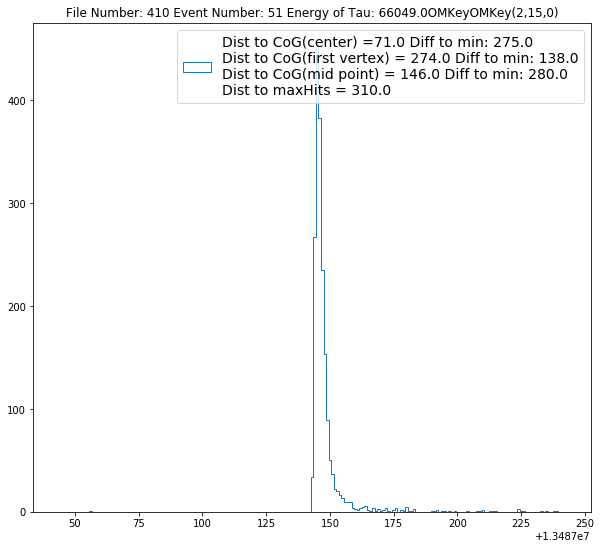

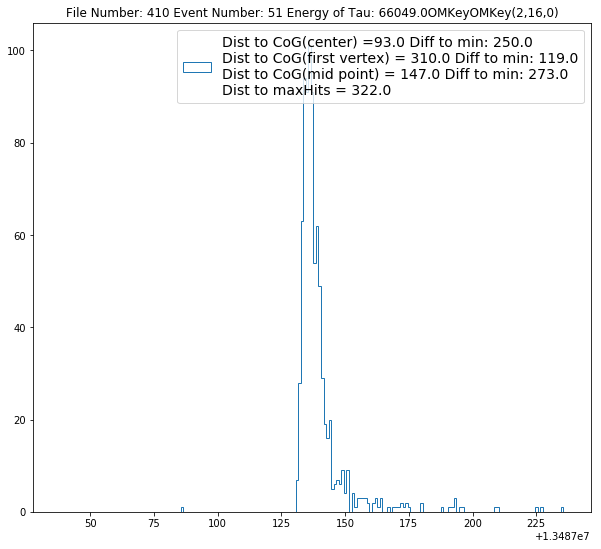

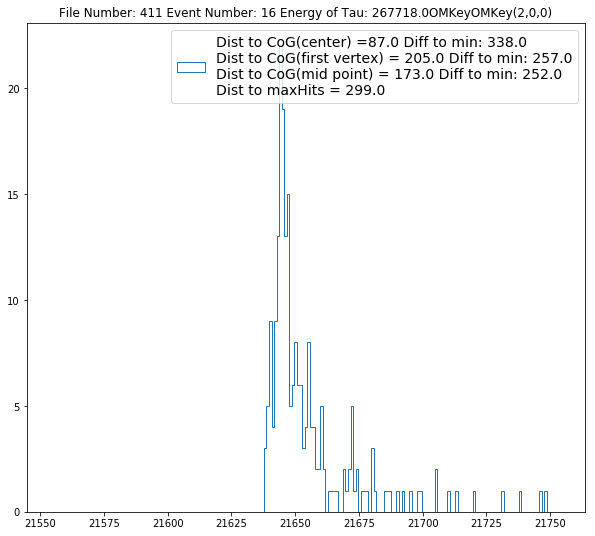

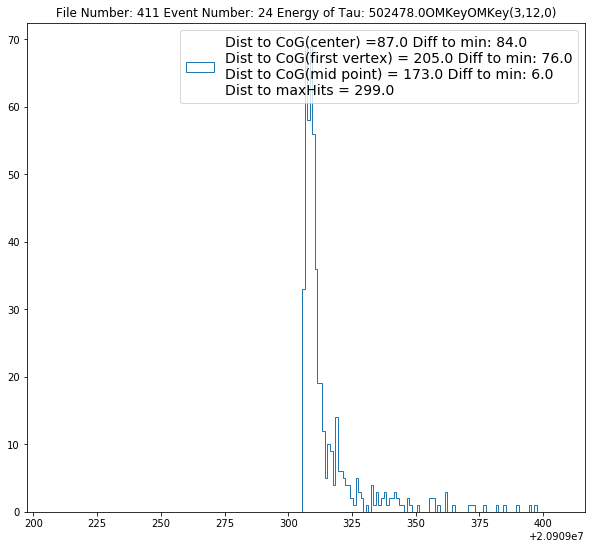

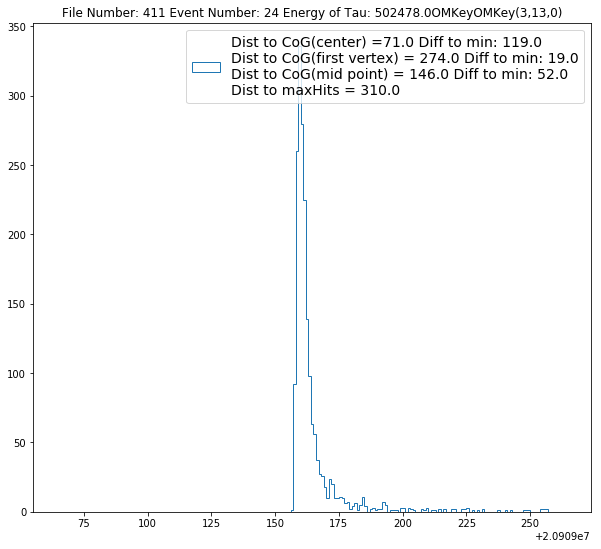

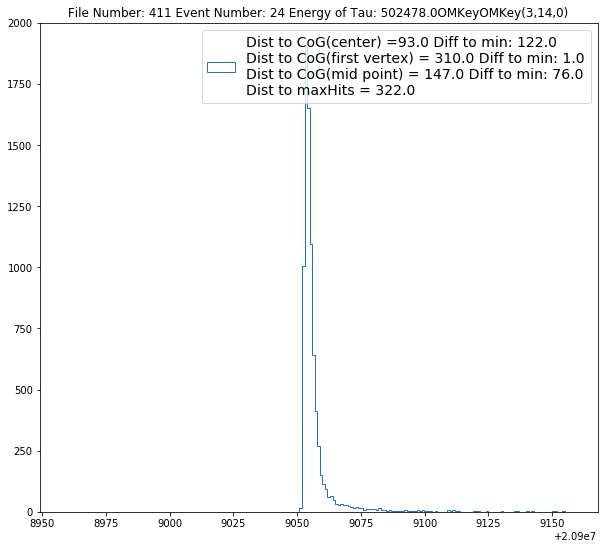

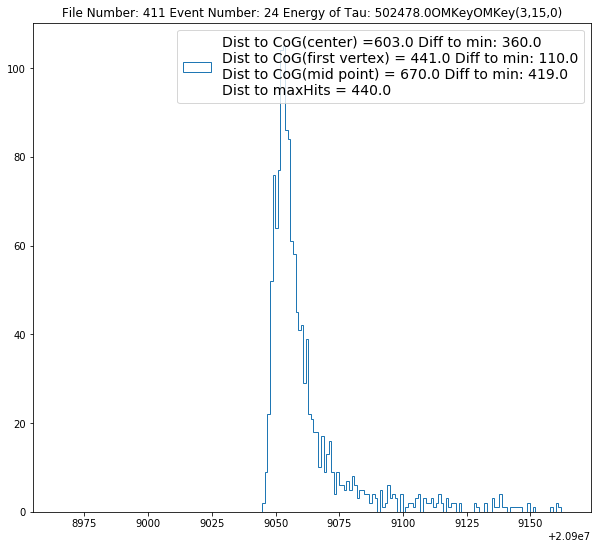

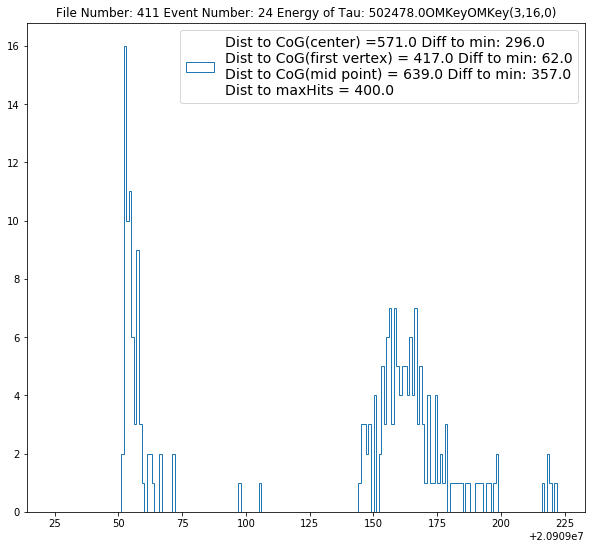

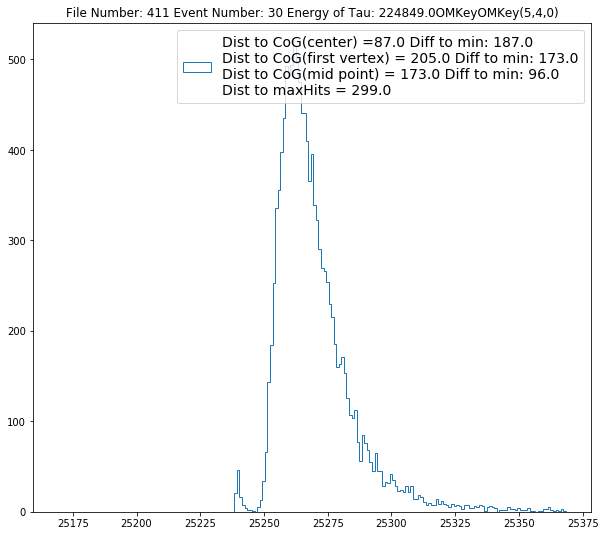

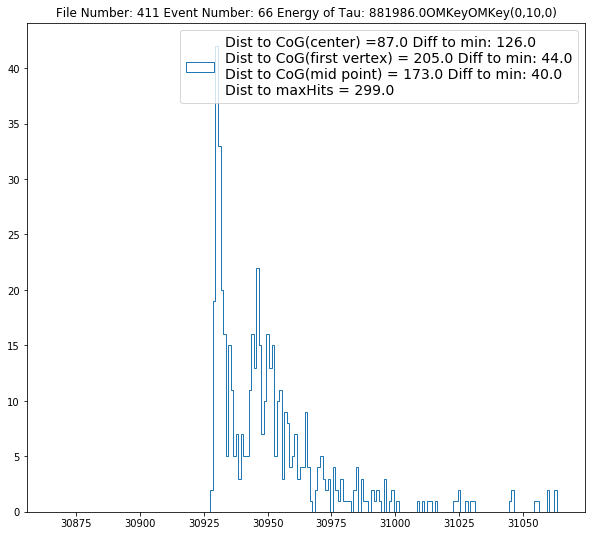

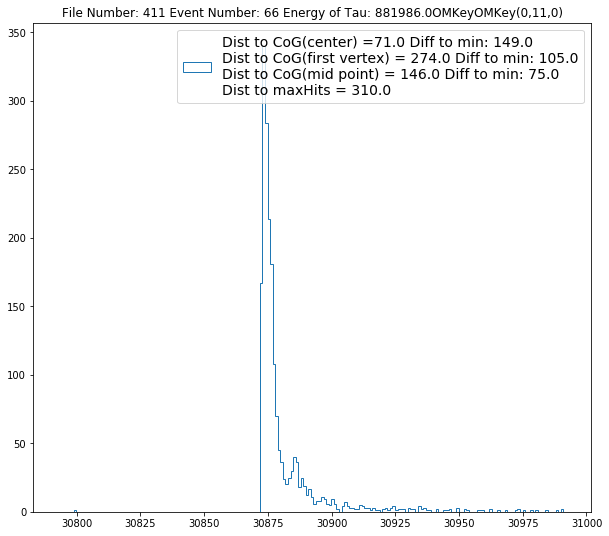

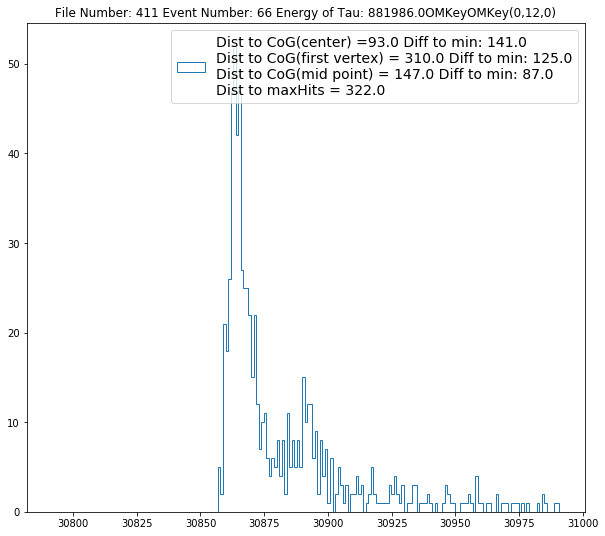

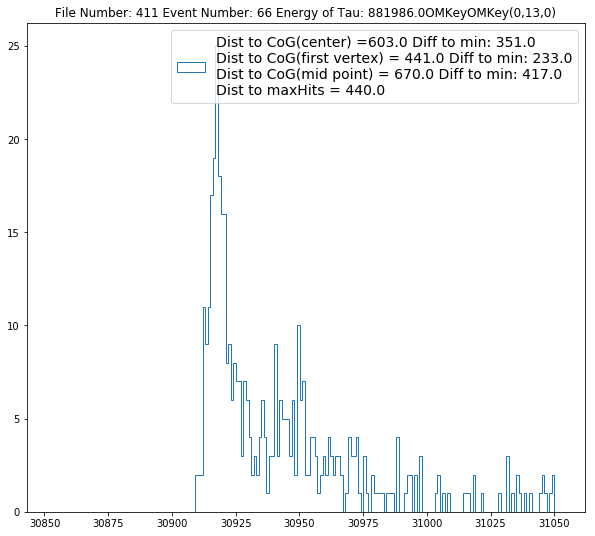

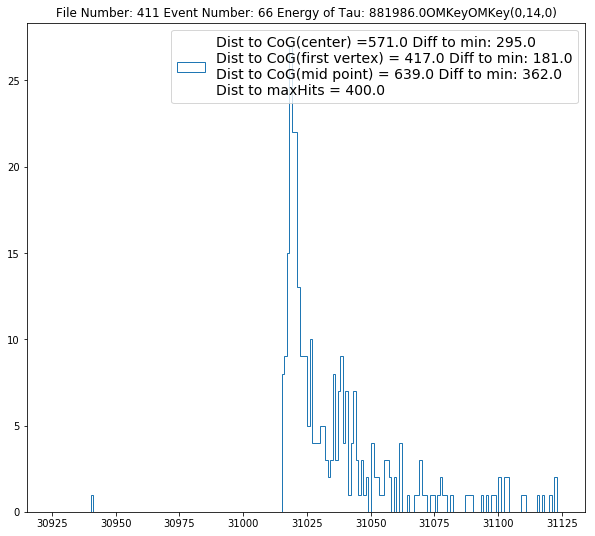

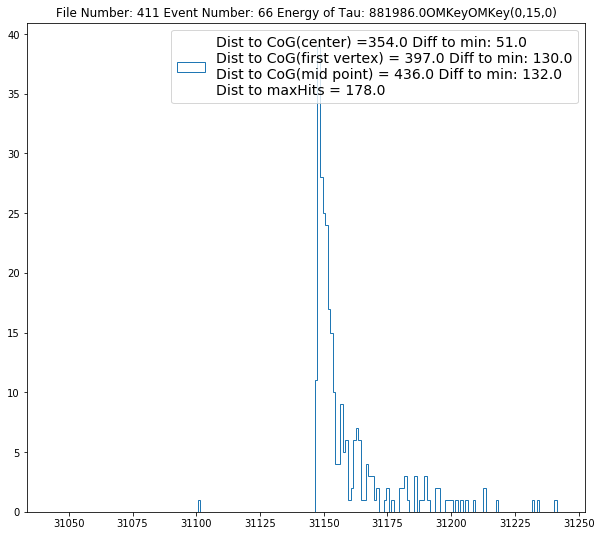

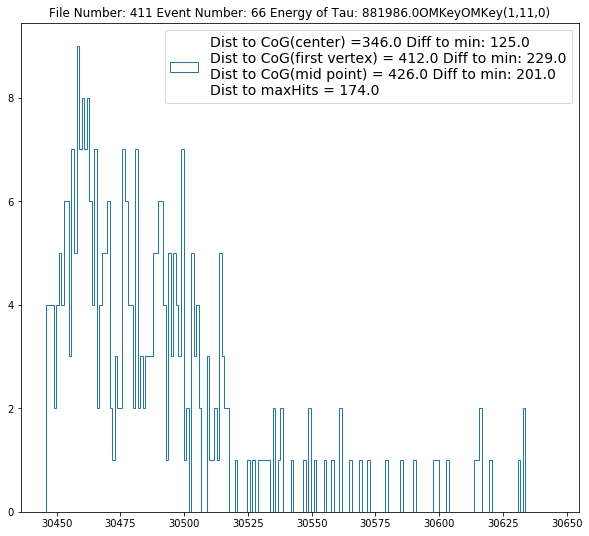

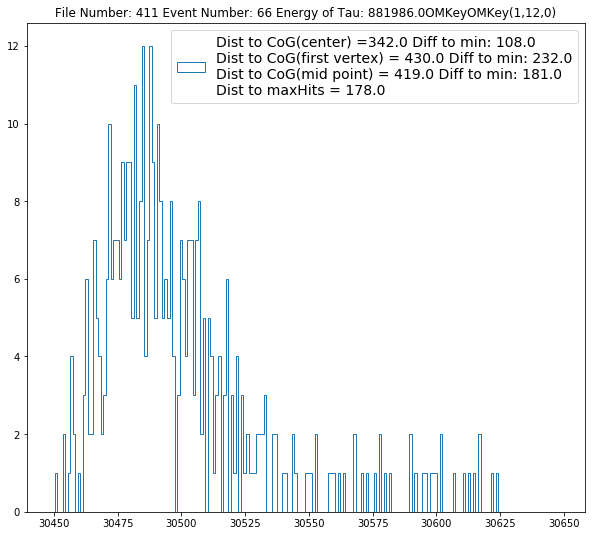

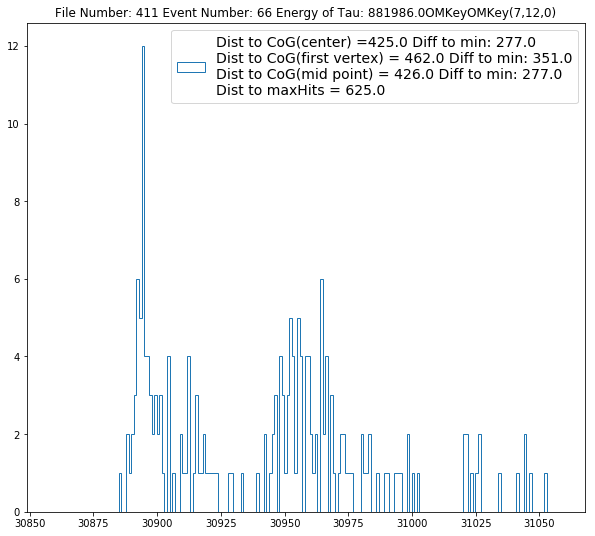

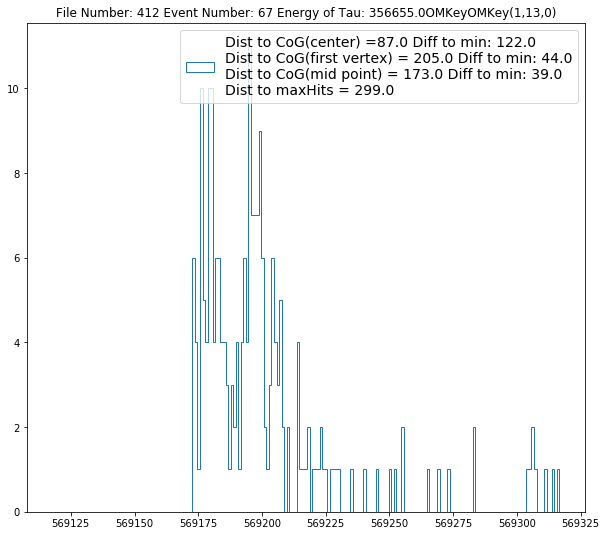

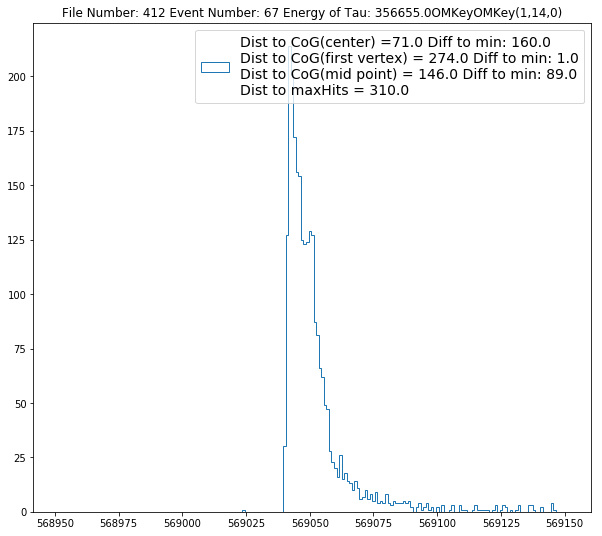

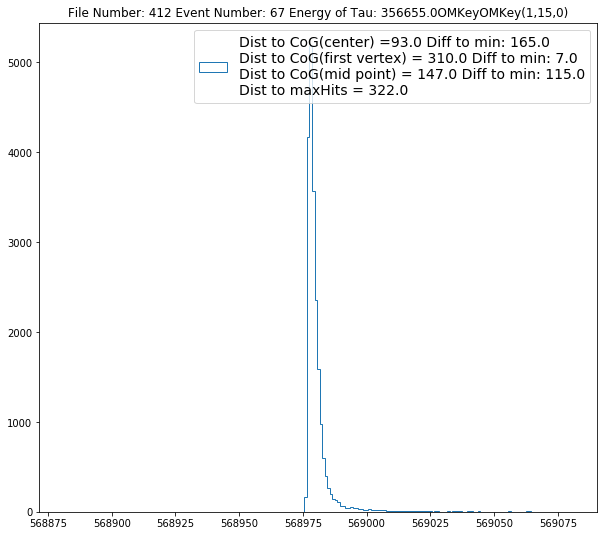

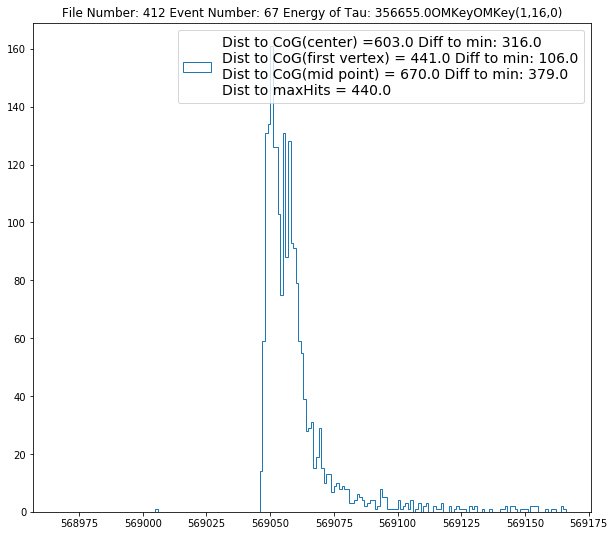

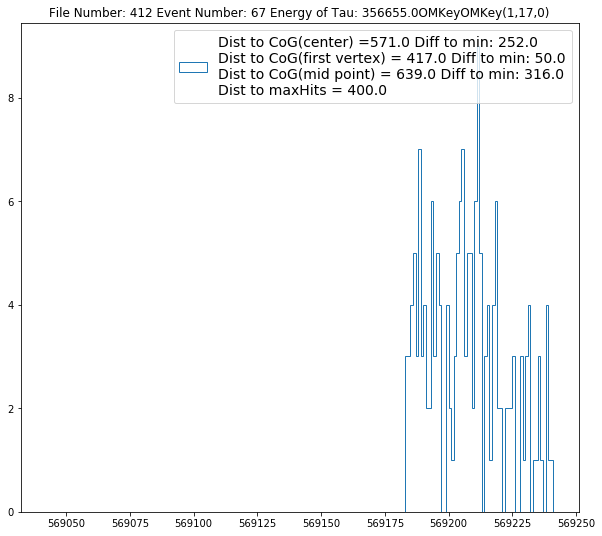

In [8]:
f = 0
distCoG, distCoG_fv, distCoG_sv, dist_max = ([]), ([]), ([]), ([])

for file_num in range(start,end):
    print(file_num)
    file = dataio.I3File(directory + 'step_4_'+str(file_num)+'_medium_water_custom_mDOM_noise.i3.gz')
    
    frame_num = 0
    for frame in file:
        #print(frame.keys())
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z
            tau_energy = lepton.energy

            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    #print(tau_daughters[td])
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z
                    
            mcpeMap = frame['MCPESeriesMap']
            noiseMap = frame['NoiseSeriesMap']
            
            smallestDist = min(doms_CoG[f, :])
            omkey_smallestDist = int(oKeys_inFrame[f, :][doms_CoG[f, :] == smallestDist])
            
            smallestDist_fv = min(doms_CoG_fv[f, :])
            omkey_smallestDist_fv = int(oKeys_inFrame[f, :][doms_CoG_fv[f, :] == smallestDist_fv])
            
            smallestDist_mid = min(doms_CoG_mid[f, :])
            omkey_smallestDist_mid = int(oKeys_inFrame[f, :][doms_CoG_mid[f, :] == smallestDist_mid])
            
            domNum = 0
            selected_doms = 0
            for omkey in noiseMap.keys():
                oKey = omgeo.get(omkey)
                
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z
                
                oKey_CoG = omgeo.get(noiseMap.keys()[omkey_smallestDist])
                oKey_CoG_fv = omgeo.get(noiseMap.keys()[omkey_smallestDist_fv])
                oKey_CoG_mid = omgeo.get(noiseMap.keys()[omkey_smallestDist_mid])
                
                domPos_CoG = oKey_CoG.position
                domPos_CoG_fv = oKey_CoG_fv.position
                domPos_CoG_mid = oKey_CoG_mid.position
        
                #noise_mcpeList = noiseMap[omkey]
                #noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
                #mcpeList = mcpeMap[omkey]
                #timeList = np.array([mcpe.time for mcpe in mcpeList])
                #tot_timeList = np.append(timeList, noise_timeList)
                
                noise_mcpeList = noiseMap[omkey]
                noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            
                if omkey in mcpeMap.keys():
                    mcpeList = mcpeMap[omkey]
                    timeList = np.array([mcpe.time for mcpe in mcpeList])
                    tot_timeList = np.append(timeList, noise_timeList)
                else:
                    tot_timeList = noise_timeList
                
                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                refractiveIndex = 1.333
                speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                speed_of_light_ns = speed_of_light_water
                
                tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]

                if abs(tDiff_ns) > 20 and abs(tDiff_ns) < 400 and firstVertex < 250 and secondVertex < 250 and len(tot_timeList) > 200:
                    distCoG = np.append(distCoG, np.sqrt((x_dom - xCoG[f])**2 + (y_dom - yCoG[f])**2 + (z_dom - zCoG[f])**2))
                    diff_CoG = abs(distCoG[selected_doms] - doms_CoG[f, domNum])
                    
                    distCoG_fv = np.append(distCoG_fv, np.sqrt((x_dom - xCoG_fv[f])**2 + (y_dom - yCoG_fv[f])**2 + (z_dom - zCoG_fv[f])**2))
                    diff_CoG_fv = abs(distCoG_fv[selected_doms] - doms_CoG_fv[f, domNum])
                    
                    distCoG_sv = np.append(distCoG_sv, np.sqrt((x_dom - xCoG_sv[f])**2 + (y_dom - yCoG_sv[f])**2 + (z_dom - zCoG_sv[f])**2))
                    diff_CoG_mid = abs(distCoG_sv[selected_doms] - doms_CoG_mid[f, domNum])
                    
                    dist_max = np.append(dist_max, np.sqrt((x_dom - max_x_dom)**2 + (y_dom - max_y_dom)**2 + (z_dom - max_z_dom)**2))
                    #print(np.sqrt((x_dom - max_x_dom)**2 + (y_dom - max_y_dom)**2 + (z_dom - max_z_dom)**2), (x_dom - max_x_dom)**2, (y_dom - max_y_dom)**2, (z_dom - max_z_dom)**2)
                    #print('DistCoG', distCoG, f)
                    #print(tDiff_ns, len(tot_timeList))
                    #print(f, 'maxHits - ', maxHits)
                    
                    plt.figure(figsize=(10,9))
                    mean_timestamps = tot_timeList.mean()
                    bins = np.arange(mean_timestamps - 100, mean_timestamps + 100, 1)
                    num, bins, _ = plt.hist(tot_timeList, bins = bins, histtype='step', label =  "Dist to CoG(center) =" + str(round(distCoG[selected_doms]))+ ' Diff to min: ' + str(round(diff_CoG)) +
                                                                                                 "\nDist to CoG(first vertex) = "+ str(round(distCoG_fv[selected_doms]))+ ' Diff to min: ' + str(round(diff_CoG_fv)) +
                                                                                                 "\nDist to CoG(mid point) = " + str(round(distCoG_sv[selected_doms]))+ ' Diff to min: ' + str(round(diff_CoG_mid)) +
                                                                                                 "\nDist to maxHits = " + str(round(dist_max[selected_doms])))
                    #plt.text(0.05, 0.95, textstr, fontsize=14, verticalalignment='top', bbox=props)
                    plt.title('File Number: ' + str(file_num) + ' Event Number: ' + str(frame_num) + ' Energy of Tau: ' + str(round(tau_energy)) + 'OMKey' + str(omkey))
                    #plt.title('TimeDiff:'+str(tDiff_ns)+' numHits:' + str(len(tot_timeList)) +  ' fv:' + str(firstVertex) + ' sv:' + str(secondVertex))
                    plt.legend(fontsize = 14)
                    selected_doms+=1
                    #plt.hist(timestamps)
                
                domNum+=1
                    
                
                    
            f = f+1
            
        frame_num+=1

In [43]:
plt.text?

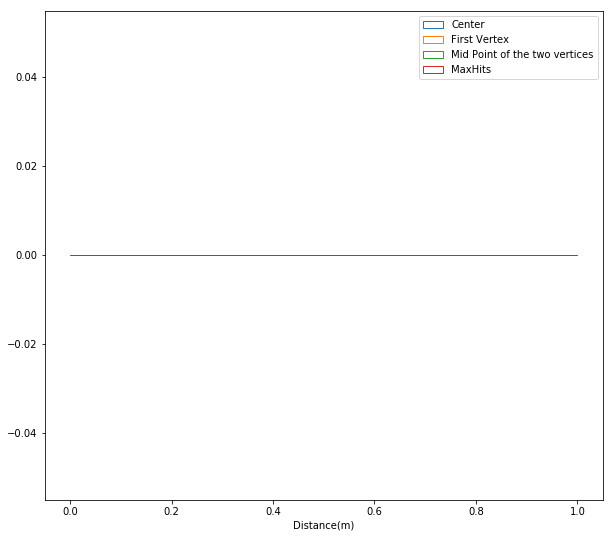

In [11]:
plt.figure(figsize=(10,9))
plt.hist(distCoG, 
         histtype='step', 
         label = 'Center')
plt.hist(distCoG_fv, 
         histtype='step', 
         label = 'First Vertex')
plt.hist(distCoG_sv, 
         histtype='step', 
         label = 'Mid Point of the two vertices')
plt.hist(dist_max, 
         histtype='step', 
         label = 'MaxHits')
plt.xlabel('Distance(m)')
plt.legend()

In [12]:
len(dist_max)

71

In [ ]:
plt.figure(figsize=(10,9))
plt.hist(distCoG, histtype='step', label = 'Center')
plt.hist(distCoG_fv, histtype='step', label = 'First Vertex')
plt.hist(distCoG_sv, histtype='step', label = 'Second Vertex')
plt.legend()

In [11]:
for file_num in range(0,1):
    print(file_num)
    file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/step_4_'+str(file_num)+'_medium_water_custom_mDOM_noise.i3.gz')
    
    x, y, z = ([]), ([]), ([])
    xfv, yfv, zfv = ([]), ([]), ([])
    xsv, ysv, zsv = ([]), ([]), ([])
    charge = ([])
    
    maxHits = 0
    timestamps = 0
    
    for frame in file:
        print(frame.keys())
        
        mcpeMap = frame['MCPESeriesMap']
        noiseMap = frame['NoiseSeriesMap']
        
        for omkey in noiseMap.keys():
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            
            if omkey in mcpeMap.keys():
                mcpeList = mcpeMap[omkey]
                timeList = np.array([mcpe.time for mcpe in mcpeList])
                tot_timeList = np.append(timeList, noise_timeList)
                print ('have physics hits')
            else:
                tot_timeList = noise_timeList
        
        break

0
['SuccPhotonMap', 'NuGPrimary', 'NoiseSeriesMap', 'MMCTrackList', 'MCTimeIncEventID', 'MCPESeriesMap', 'I3Photons', 'I3MCTree_clsim', 'clsim_stats', 'I3MCTree_NuGen_RNGState', 'I3MCWeightDict', 'I3MCTree_NuGen', 'I3MCTree', 'I3EventHeader']
have physics hits
have physics hits
have physics hits
have physics hits
have physics hits
have physics hits


0
1
2


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3


KeyboardInterrupt: 

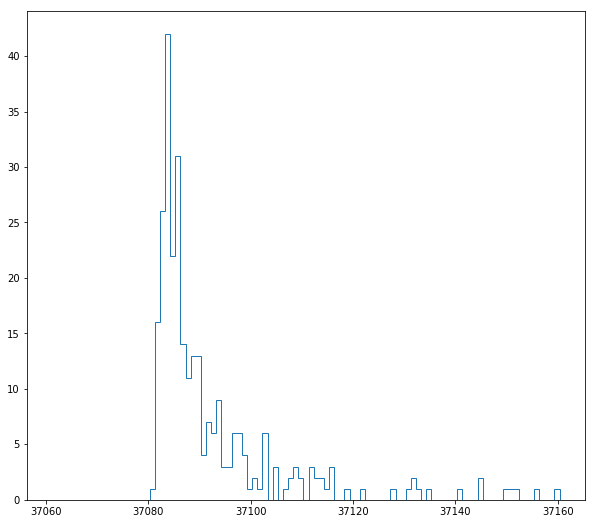

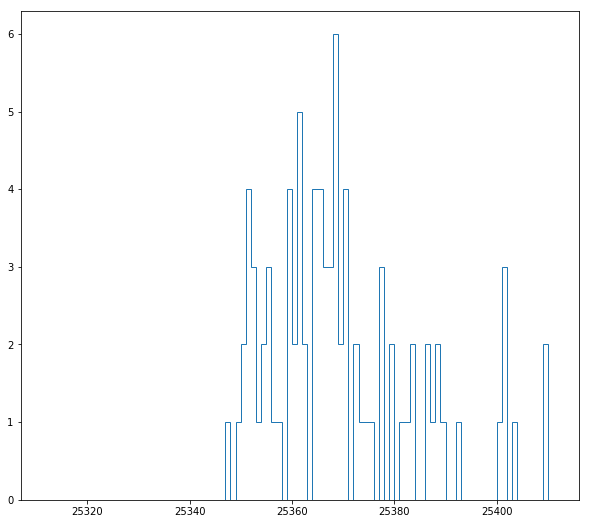

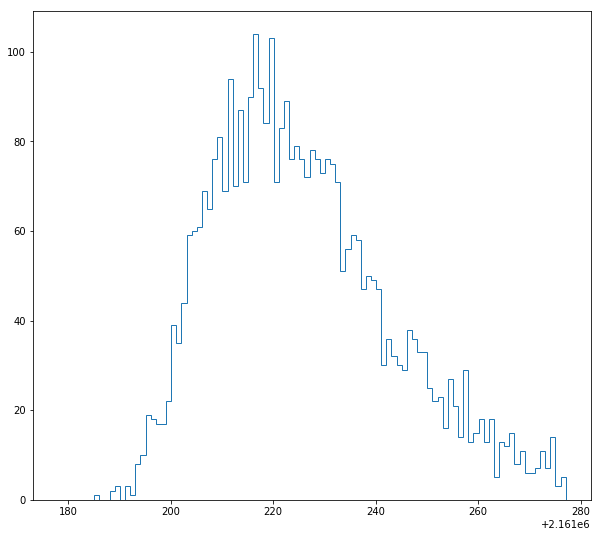

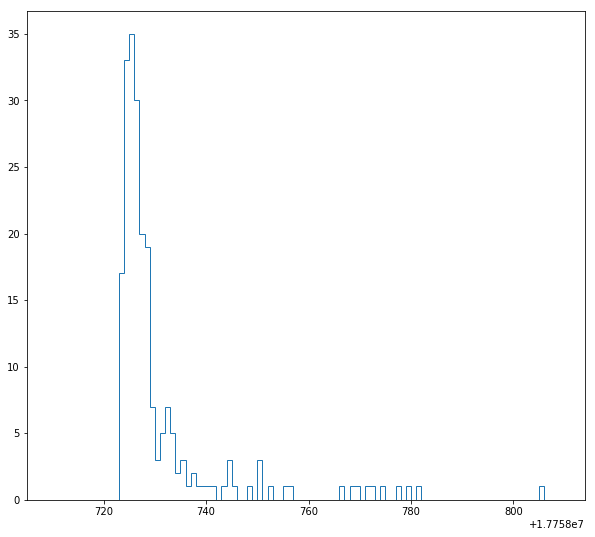

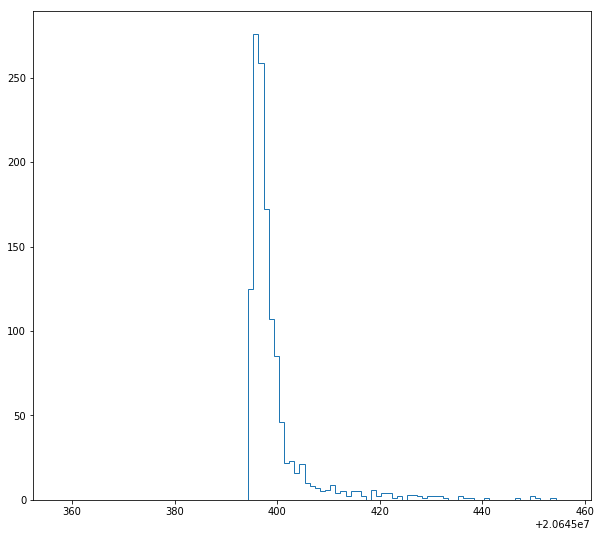

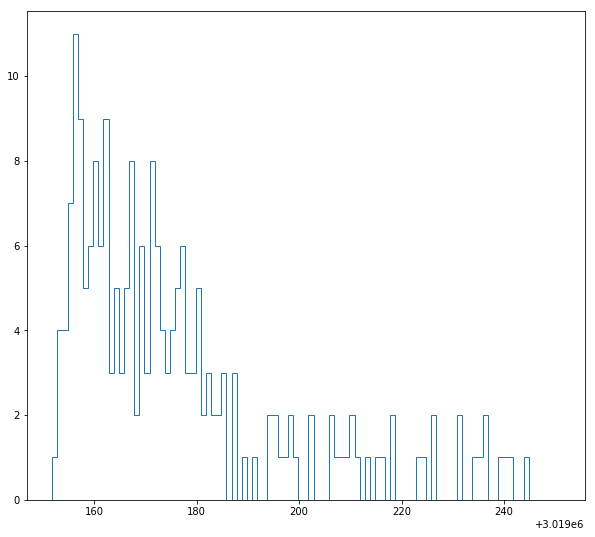

In [ ]:
for i in range(0, 10):
    print(i)
    
    filename = dataio.I3File('/data/p-one/akatil/step_4_medium_water/step_4_'+str(i)+'_medium_water_custom_mDOM_noise.i3.gz')

    f = 1
    for frame in filename:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
    
        if lepton.type == 15 or lepton.type == -15:  
        
            mcpeMap = frame['MCPESeriesMap']
            noiseMap = frame['NoiseSeriesMap']
        
            maxHits = 0
            timestamps = 0
    
            for omkey in mcpeMap.keys():
                oKey = omgeo.get(omkey)
        
                noise_mcpeList = noiseMap[omkey]
                noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
                mcpeList = mcpeMap[omkey]
                timeList = np.array([mcpe.time for mcpe in mcpeList])
                tot_timeList = np.append(timeList, noise_timeList)
            
                if len(tot_timeList) > maxHits:
                    maxHits = len(tot_timeList)
                    timestamps = tot_timeList
                
            if maxHits > 100:
                #print(f, 'maxHits - ', maxHits)
                plt.figure(figsize=(10,9))
                mean_timestamps = timestamps.mean()
                bins = np.arange(mean_timestamps - 50, mean_timestamps + 50, 1)
                plt.hist(timestamps, bins = bins, histtype='step')
                #plt.hist(timestamps)

    
            f = f+1